# Gaussian Blur, Medical Images

### Import resources and display image

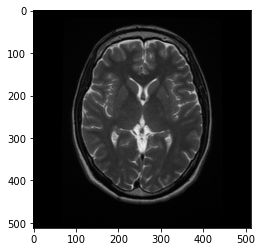

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/brain_MR.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Gaussian blur the image

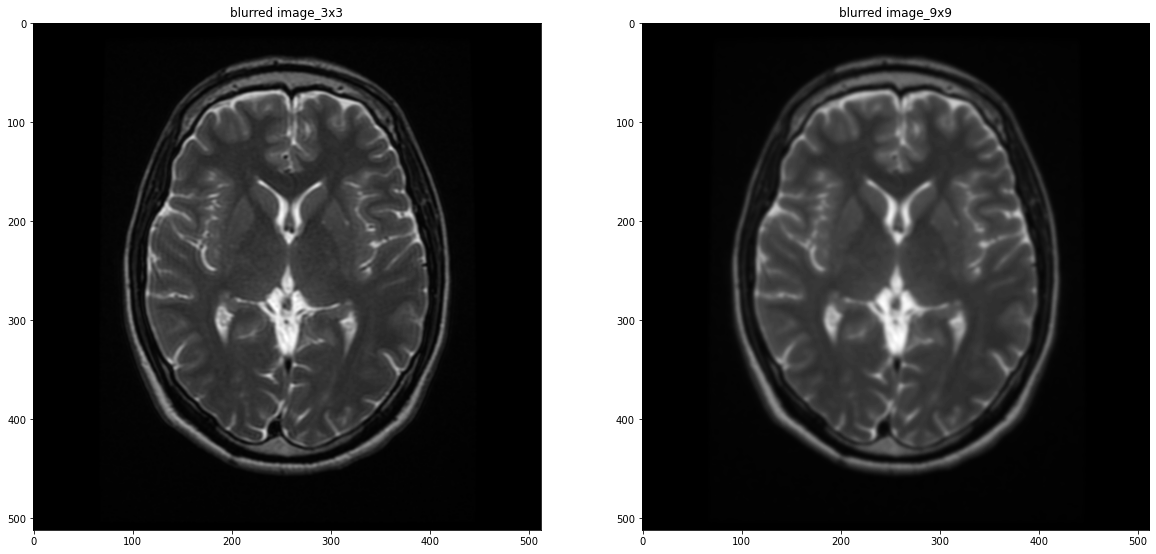

In [10]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a Gaussian blurred image
gray_blur_1 = cv2.GaussianBlur(gray, (3, 3), 0)

gray_blur_2 = cv2.GaussianBlur(gray, (9, 9), 0)

f, (ax2, ax3) = plt.subplots(1, 2, figsize=(20,10)) # ax1, 

# ax1.set_title('original gray')
# ax1.imshow(gray, cmap='gray')

ax2.set_title('blurred image_3x3')
ax2.imshow(gray_blur_1, cmap='gray')

ax3.set_title('blurred image_9x9')
ax3.imshow(gray_blur_2, cmap='gray')

### Test performance with a high-pass filter

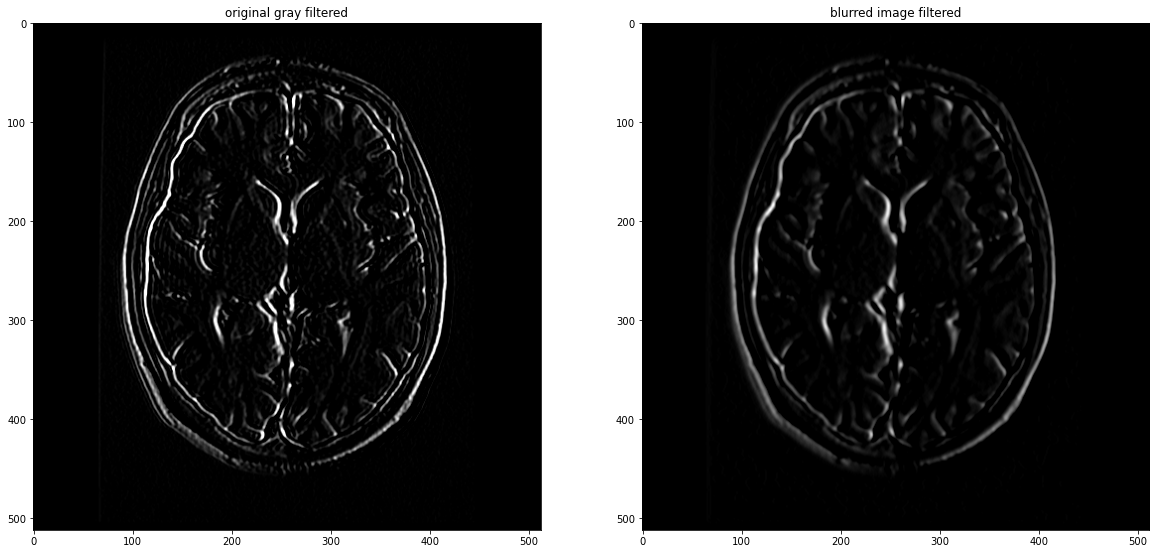

In [16]:
# High-pass filter 

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])


# Filter the orginal and blurred grayscale images using filter2D
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur_2, -1, sobel_x)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray filtered')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('blurred image filtered')
ax2.imshow(filtered_blurred, cmap='gray')

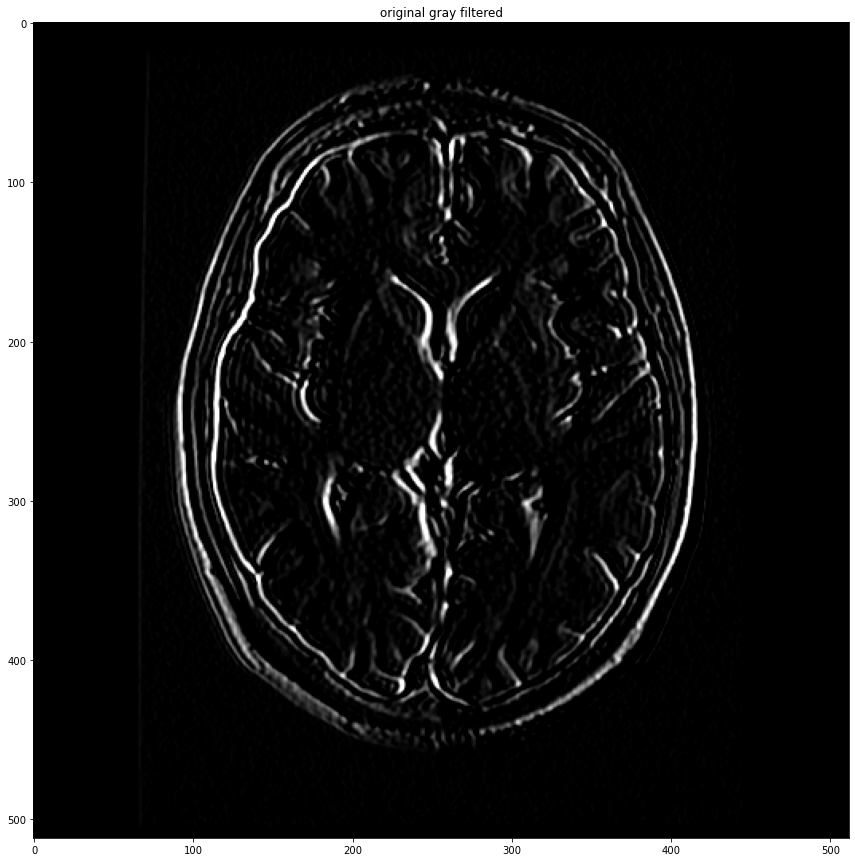

In [25]:
filtered = cv2.filter2D(gray, -1, sobel_x)
f, (ax) = plt.subplots(1, 1, figsize=(30,15))
ax.set_title('original gray filtered')
ax.imshow(filtered, cmap='gray') #  # filtered # filtered_blurred
plt.show()

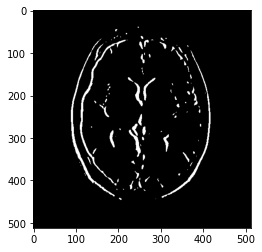

In [14]:
# Create threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')


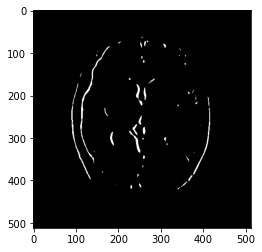

In [15]:
retval, binary_image = cv2.threshold(filtered_blurred, 100, 255, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
